# **Assignment 10**

In [87]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

#plotly or other graphing library
import plotly.express as px

In [88]:
# Reading the data from GitHub
csv_path = 'https://raw.githubusercontent.com/uzmabb182/Data602_Assignments/main/resources/Iris.csv'
iris_df = pd.read_csv(csv_path, encoding="utf-8")
# iris_df.head()

csv_path = 'https://raw.githubusercontent.com/uzmabb182/Data602_Assignments/main/resources/Boston.csv'
boston_df = pd.read_csv(csv_path, encoding="utf-8")
# boston_df.head()


### Label Encoding for target variable

In [89]:
# Convert categorical data to numeric and separate target feature for training data
# using LabelEncoder() encoding method for the entire dataframe 

iris_df["Species"] = LabelEncoder().fit_transform(iris_df["Species"])
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Loading the Boston Dataset 

In [90]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

### Loading the Iris dataset by calling the function load_iris()

In [91]:
# Load datasets here once and assign to variables iris and boston

iris_data = ds.load_iris()
boston_data = ds.load_boston()
boston_data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [92]:
# import iris dataset
iris_data = ds.load_iris()
# np.c_ is the numpy concatenate function
df = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                      columns= iris_data['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Preparing the data for classification
### Creating NumPy arrays for the features and the target variable

In [93]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [94]:
y = iris_df["Species"].values

X = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

In [95]:
y.shape

(150,)

In [96]:
X.shape

(150, 4)

### Splitting the data using scikit-learn’s built-in, train_test_split function

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


### Scaling the Data by Standard Scaler Function:

In [98]:
# Scaling the X_train data by using the StandardScaler() function
scaler = StandardScaler()

# Fitting the scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_train_scaled

array([[ 7.25650803e-01,  3.47647490e-01,  4.22322444e-01,
         3.97758449e-01],
       [ 2.35661515e-01, -1.90562328e+00,  1.38793949e-01,
        -2.63074417e-01],
       [-1.31830451e-01, -1.22964205e+00,  7.05850940e-01,
         1.05859131e+00],
       [-9.33312930e-03,  2.15026410e+00, -1.44896562e+00,
        -1.32040700e+00],
       [ 8.48148125e-01, -1.03006664e-01,  8.19262338e-01,
         1.05859131e+00],
       [-8.66814384e-01,  1.02362872e+00, -1.33555423e+00,
        -1.32040700e+00],
       [ 3.58158837e-01, -5.53660817e-01,  1.38793949e-01,
         1.33425302e-01],
       [ 6.03153481e-01, -1.22964205e+00,  7.05850940e-01,
         9.26424741e-01],
       [ 1.13164193e-01,  3.47647490e-01,  5.92439542e-01,
         7.94258168e-01],
       [-7.44317062e-01,  1.02362872e+00, -1.27884853e+00,
        -1.32040700e+00],
       [ 8.48148125e-01, -1.03006664e-01,  1.15949653e+00,
         1.32292446e+00],
       [-8.66814384e-01,  5.72974566e-01, -1.16543713e+00,
      

In [99]:
# Scaling the X_test data by using StandardScaler()
scaler = StandardScaler()

# Fitting the scaler
X_scaler = scaler.fit(X_test)

# Scaling data
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[ 1.15880315e+00,  6.61722223e-02,  7.63269830e-01,
         1.43174515e+00],
       [ 8.73070868e-02, -1.81973611e-01,  5.91534118e-01,
         7.82263984e-01],
       [ 5.63527560e-01, -6.78265278e-01,  1.04949602e+00,
         1.17195268e+00],
       [ 1.75407874e+00, -6.78265278e-01,  1.33572220e+00,
         9.12160218e-01],
       [ 8.01637797e-01, -4.30119445e-01,  4.77043644e-01,
         1.32782816e-01],
       [-1.10324410e+00,  3.14318056e-01, -1.46929442e+00,
        -1.29607575e+00],
       [ 9.20692915e-01,  6.61722223e-02,  3.62553169e-01,
         2.62679050e-01],
       [-6.27023623e-01,  1.55504722e+00, -1.29755871e+00,
        -1.29607575e+00],
       [-1.22229922e+00,  6.61722223e-02, -1.29755871e+00,
        -1.42597199e+00],
       [ 1.15880315e+00,  6.61722223e-02,  6.48779355e-01,
         3.92575283e-01],
       [-5.07968505e-01,  1.05875556e+00, -1.41204919e+00,
        -1.29607575e+00],
       [ 9.20692915e-01,  5.62463889e-01,  1.10674125e+00,
      

### Instantiate the model, a KNN Classifier with 5 Neighbors

**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [100]:
knn = KNN(n_neighbors=5)

knn

KNeighborsClassifier()

### Fit the model classifier on the training data

In [101]:
# knn.fit(X_train_scaled, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Now pass the unseen data using the .predict() method and passing the multi dimensional NumPy array

In [102]:
# y_pred = knn.predict(X_test_scaled)
y_pred = knn.predict(X_test)

### Print the predictions for X_test

In [103]:
print("Predictions: {}".format(y_pred))

Predictions: [2 2 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


### Measuring the model Performance for checking if the model is making correct predictions

In [104]:
knn.score(X_test, y_test)

0.9777777777777777

### How to interpret K;
Large K = less complex model = can cause underfitting (less able to detect relationship in the datasets)

Small K = more complex model = can lead to overfitting (sensitive to noise in the data rather than reflecting general trends)


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

### Model Complexity Curve and over/underfitting

### Plotting the Curves:

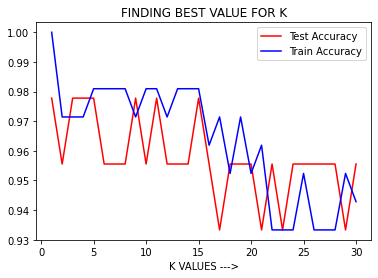

In [105]:
# To plot test accuracy and train accuracy Vs K value.
p = list(range(1, 31))
lst_test =[]
lst_train =[]
for i in p:
    knn = KNN(n_neighbors = i)
    knn.fit(X_train, y_train)
    z = knn.score(X_test, y_test)
    t = knn.score(X_train, y_train)
    lst_test.append(z)
    lst_train.append(t)
      
plt.plot(p, lst_test, color ='red', label ='Test Accuracy')
plt.plot(p, lst_train, color ='b', label ='Train Accuracy')
plt.xlabel('K VALUES --->')
plt.title('FINDING BEST VALUE FOR K')
plt.legend()

**Q5** 10 pts

**Data set: Boston**


* Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Boston target values into a separate DataFrame

* Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values 

In [106]:
# Loading the dataset
boston_data = ds.load_boston()
boston_data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [107]:
type(boston_data)
boston_data['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [108]:
boston_data['data'].shape

(506, 13)

In [109]:
boston_data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [110]:
boston_data['target'].shape

(506,)

### Loading Data into dataframe checking the keys

In [111]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [112]:
boston_df = pd.DataFrame(boston_data.data)
boston_df.shape

(506, 13)

In [113]:
print(boston_data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
print(boston_data.DESCR)

### Add the column names by using the feature_names method and pass the column names into boston_pd.

In [ ]:
boston_df.columns = boston_data.feature_names
print(boston_df)

In [116]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

### Loading the Target into seperate dataframe

In [123]:
boston_data['target'].shape

(506,)

In [124]:
boston_data.target
target_df= pd.DataFrame(boston_data.target)
target_df.shape

(506, 1)

In [125]:
boston_df.shape

(506, 13)

### Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values

In [120]:
boston_df["AGE"].mean()

68.57490118577076

In [126]:
target_df.mean()

0    22.532806
dtype: float64

In [ ]:
# convert dataframe to numpy array
numpy_arr = target_df.to_numpy()
numpy_arr

**Q6** 

**Data set: Boston**

* In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

* Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

* Return back PTRATIO as a NumPy array

In [128]:
# Now in the correct shape for the model
X = boston_df["PTRATIO"].values
X = X.reshape(-1, 1)
print(X.shape)

(506, 1)


In [129]:
y = target_df.values
print(y.shape)

(506, 1)


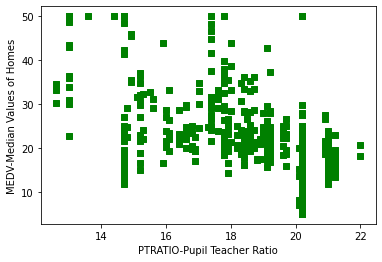

In [130]:
plt.scatter(X, y, color="green", marker="s")

plt.xlabel("PTRATIO-Pupil Teacher Ratio")
plt.ylabel("MEDV-Median Values of Homes")

plt.show()

In [ ]:
# Converting to NumPy
boston_df["PTRATIO"].to_numpy()

**Q7**

**Data set: Boston**

* Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib


* Use np.linspace() to generate prediction X values from min to max PTRATIO

* Return back the regression prediction space and regression predicted values

* Make sure to labels axes appropriately

### Creating a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib

In [136]:
X = boston_df["PTRATIO"].values
y = target_df.values

print(y.shape, X.shape)

(506, 1) (506,)


### Convert the feature x to two dimentional array for applying linear regression.

In [133]:
# Now in the correct shape for the model
X = X.reshape(-1, 1)
print(X.shape)

(506, 1)


### Plotting the MEDV and PTRATO for the relationship

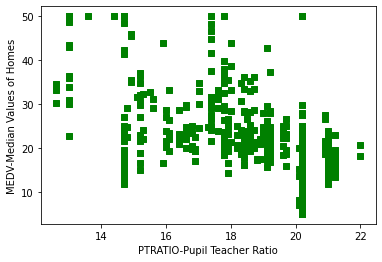

In [134]:
plt.scatter(X, y, color="green", marker="s")

plt.xlabel("PTRATIO-Pupil Teacher Ratio")
plt.ylabel("MEDV-Median Values of Homes")

plt.show()

### Fitting a Linear regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib.

### This gives a line of best fit for our data

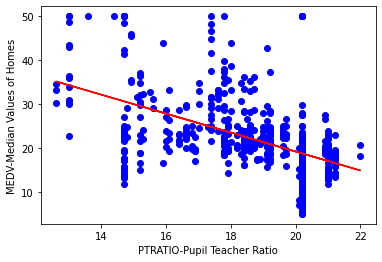

In [135]:
# Fitting the MEDV / PTRATIO features in the linear model
linear_regressor = LinearRegression().fit(X, y) 

# Pricdicting the line of best fit for PTRATIO feature
y_pred = linear_regressor.predict(X) 
plt.scatter(X, y, color="blue")
plt.plot(X, y_pred, color='Red')

plt.xlabel("PTRATIO-Pupil Teacher Ratio")
plt.ylabel("MEDV-Median Values of Homes")

plt.show()

### The red line represents the linear regression model fit for "MEDV-Median Values of Homes"and "PTRATIO-Pupil Teacher Ratio" and shows a negative reationship.

### Use np.linspace() to generate prediction X values from min to max PTRATIO
### Return back the regression prediction space and regression predicted values

In [147]:
# Creating a sequence of length of PTRATIO values in range min to max

length = len(boston_df["PTRATIO"])
max_val = boston_df["PTRATIO"].max()
min_val = boston_df["PTRATIO"].min()

X_arr= np.linspace(min_val, max_val, length)
X_arr.shape

(506,)

In [148]:
# Now in the correct shape for the model
X = X_arr.reshape(-1, 1)
print(X.shape)

(506, 1)


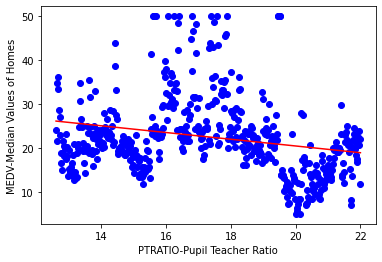

In [149]:
# Fitting the MEDV / PTRATIO features in the linear model
linear_regressor = LinearRegression().fit(X, y) 

# Pricdicting the line of best fit for PTRATIO feature
y_pred = linear_regressor.predict(X) 
plt.scatter(X, y, color="blue")
plt.plot(X, y_pred, color='Red')

plt.xlabel("PTRATIO-Pupil Teacher Ratio")
plt.ylabel("MEDV-Median Values of Homes")

plt.show()